In [26]:
%reset -f

import numpy as np
from matplotlib import pyplot as plt

In [27]:
dimensionality = 2
np.random.seed(42)
ranges = np.arange(0, 2.1, 0.5).tolist()
numbers = np.arange(0, 2.1, 0.5)
size = 10
truth_test = np.random.choice(numbers, size=(size, dimensionality), replace=True)
pred_test = np.random.choice(numbers, size=(size, dimensionality), replace=True)

In [28]:
#  TODO: test code for the reweighting method (toy model test)
# only consider 4-dim leading lepton kinematics
def rc(truth, pred):
    # Compute the ratio of prediction to truth --> rc
    # Parameters
    n_dim_temp = pred.shape[-1]
    bins = [ranges] * n_dim_temp

    truth_hist_temp, edges = np.histogramdd(
        truth,
        bins=bins,
        density=False,
    )
    print("truth_hist_temp:\n", truth_hist_temp)
    pred_hist_temp, _ = np.histogramdd(
        pred,
        bins=bins,
        density=False,
    )
    print("pred_hist_temp:\n", pred_hist_temp)
    rc = np.divide(
        truth_hist_temp,
        pred_hist_temp,
        out=np.zeros_like(truth_hist_temp),
        where=pred_hist_temp != 0.,
    )
    print("rc:\n", rc)
    return rc, edges, bins, 


# Digitize the data --> retrivr corresponding position in the 4-d histogram
def digitize_data(data, rc, edges):
    n_dim = data.shape[-1]
    digitized = np.zeros_like(data, dtype=int)
    for dim in range(n_dim):
        digitized[:, dim] = np.digitize(data[:, dim], edges[dim], right=False) - 1
        digitized[:, dim] = np.clip(digitized[:, dim], 0, len(edges[-1]) - 2)
    print("digitized:\n", digitized)
    # print(digitized.shape)
    reweighting_coefficients = np.array(
        [rc[tuple(digitized[i])] for i in range(data.shape[0])]
    )
    print(reweighting_coefficients)
    return reweighting_coefficients

truth:
 [[1.5 2. ]
 [1.  2. ]
 [2.  0.5]
 [1.  1. ]
 [1.  2. ]
 [1.5 1. ]
 [2.  0.5]
 [1.5 0.5]
 [1.5 2. ]
 [0.  1.5]]
pred :
 [[0.5 2. ]
 [1.5 0. ]
 [0.  1. ]
 [1.  0.5]
 [1.5 1.5]
 [1.  1.5]
 [1.5 0. ]
 [1.  2. ]
 [1.  2. ]
 [0.  0.5]]
truth_hist_temp:
 [[0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 1. 2.]
 [0. 3. 1. 2.]]
pred_hist_temp:
 [[0. 1. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 3.]
 [2. 0. 0. 1.]]
rc:
 [[0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.66666667]
 [0.         0.         0.         2.        ]]
digitized:
 [[1 3]
 [3 0]
 [0 2]
 [2 1]
 [3 3]
 [2 3]
 [3 0]
 [2 3]
 [2 3]
 [0 1]]
[0.         0.         0.         0.         2.         0.66666667
 0.         0.66666667 0.66666667 0.        ]


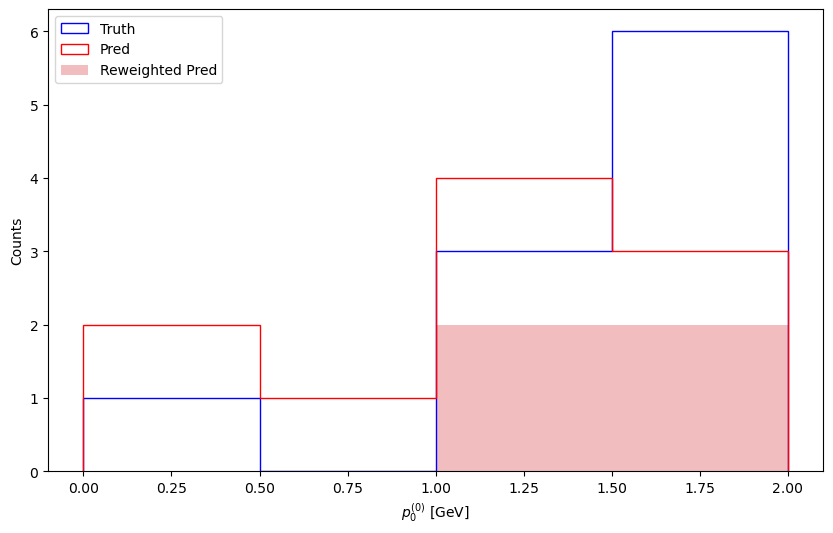

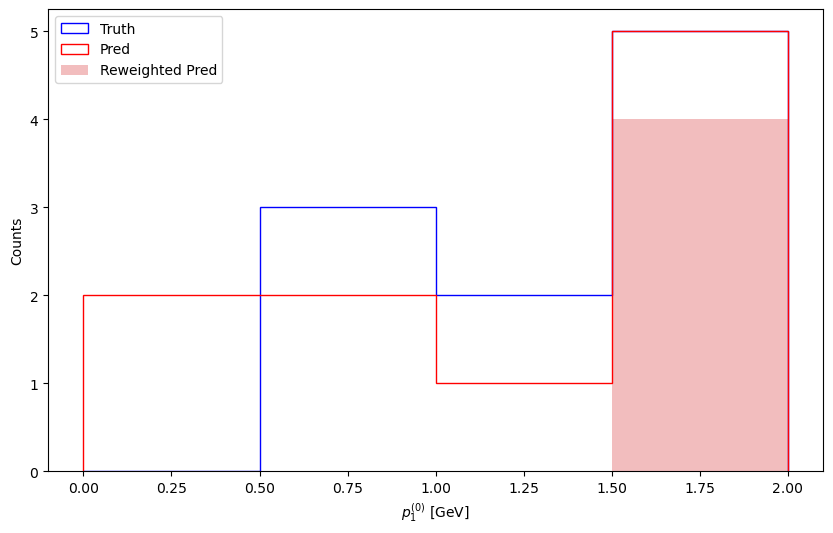

truth:  [1 0 3 6]

pred :  [2 1 4 3]

man reweight: [1. 0. 3. 6.]

alg reweight: [0. 0. 2. 2.]



In [29]:
print("truth:\n", truth_test)
print("pred :\n", pred_test)
rc_w0, edges_w0, bins = rc(
    truth_test[:, 0:dimensionality], pred_test[:, 0:dimensionality]
)
reweighting_coefficients = digitize_data(
    pred_test[:, 0:dimensionality], rc_w0, edges_w0
)

# Calculate the original histograms
n_dims = pred_test[:, 0:dimensionality].shape[1]


def calculate_histograms(data, weights=None):
    return [
        np.histogram(data[:, i], bins=bins[i], weights=weights)[0] for i in range(n_dims)
    ]


truth_hist = calculate_histograms(truth_test[:, 0:dimensionality])
pred_hist = calculate_histograms(pred_test[:, 0:dimensionality])
# print(truth_hist, pred_hist)
reweighted_hist = calculate_histograms(
    pred_test[:, 0:dimensionality], weights=reweighting_coefficients
)


# Plot the histograms
for dim in range(n_dims):
    plt.figure(figsize=(10, 6))
    plt.hist(
        edges_w0[dim][:-1],
        bins=edges_w0[dim],
        weights=truth_hist[dim],
        histtype="step",
        label="Truth",
        color="blue",
        density=False,
    )
    plt.hist(
        edges_w0[dim][:-1],
        bins=edges_w0[dim],
        weights=pred_hist[dim],
        histtype="step",
        label="Pred",
        color="red",
        density=False,
    )
    plt.hist(
        edges_w0[dim][:-1],
        bins=edges_w0[dim],
        weights=reweighted_hist[dim],
        histtype="bar",
        label="Reweighted Pred",
        color="tab:red",
        alpha=0.3,
        density=False,
    )
    # plt.xlim(plot_bins_range[dim])
    plt.xlabel(f"$p^{{(0)}}_{dim}$ [GeV]")
    plt.ylabel("Counts")
    plt.legend()
    plt.show()
    
print("truth: ", truth_hist[0], end="\n\n")
print("pred : ", pred_hist[0], end="\n\n")
print("man reweight:", pred_hist[0] * (truth_hist[0] / pred_hist[0]), end="\n\n")
print("alg reweight:", reweighted_hist[0], end="\n\n")

In [30]:
few_data = 100 * (reweighted_hist[0] - truth_hist[0]) / truth_hist[0]
print(f"differences: {few_data}")

differences: [-100.                   nan  -33.33333333  -66.66666667]


/tmp/ipykernel_3070761/840104913.py:1: RuntimeWarning: invalid value encountered in divide
  few_data = 100 * (reweighted_hist[0] - truth_hist[0]) / truth_hist[0]
